# Audio Basics

In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

## 获取一个文件夹内的所有音频文件

通过一个通配符`*`遍历一个文件夹里的所有音频文件

In [2]:
import os
import glob

parent_dir = '../data/UrbanSound8K/audio/'
sub_dir = 'samples/'
file_name = '*.wav'
files = glob.glob(os.path.join(parent_dir, sub_dir, file_name))

for file in files:
    print(file)

../data/UrbanSound8K/audio/samples\14113-4-0-0.wav
../data/UrbanSound8K/audio/samples\15564-2-0-0.wav
../data/UrbanSound8K/audio/samples\17592-5-0-0.wav
../data/UrbanSound8K/audio/samples\19026-1-0-0.wav
../data/UrbanSound8K/audio/samples\21684-9-0-5.wav
../data/UrbanSound8K/audio/samples\40722-8-0-0.wav
../data/UrbanSound8K/audio/samples\59277-0-0-2.wav
../data/UrbanSound8K/audio/samples\7061-6-0-0.wav
../data/UrbanSound8K/audio/samples\7383-3-0-0.wav
../data/UrbanSound8K/audio/samples\98223-7-7-0.wav


## 音频文件的读取与播放

音频文件可以用`librosa.lood()`读取，返回采样与采样率

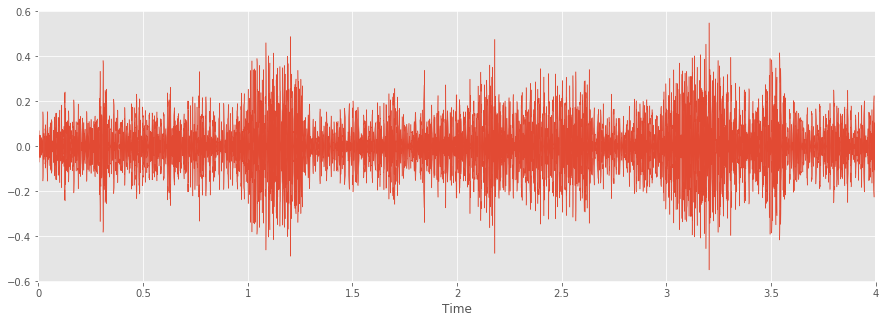

In [3]:
x, sr = librosa.load(files[4])
plt.figure(figsize=(15,5))
librosa.display.waveplot(x, sr=sr)

plt.show()

在Jupyter lab中播放，有两种方法，可以直接读取文件，也可以从上面读取后的`x`直接播放

In [4]:
sr

22050

In [4]:
print('street_music:\n')
ipd.Audio(files[4])

street_music:



In [5]:
ipd.Audio(x, rate=sr)

保存音频

In [6]:
# librosa.output.write_wav('./test_save.wav', x, sr)

## 对文件夹内所有音频进行操作

上面通过遍历文件夹中的文件名，得到了一个存有音频文件路径的`files`矩阵。之后我们可以使用`for`循环遍历文件。

In [7]:
files[4]

'../data/UrbanSound8K/audio/samples\\21684-9-0-5.wav'

使用`split`提取文件名中的一部分信息

In [8]:
files[4].split('\\')

['../data/UrbanSound8K/audio/samples', '21684-9-0-5.wav']

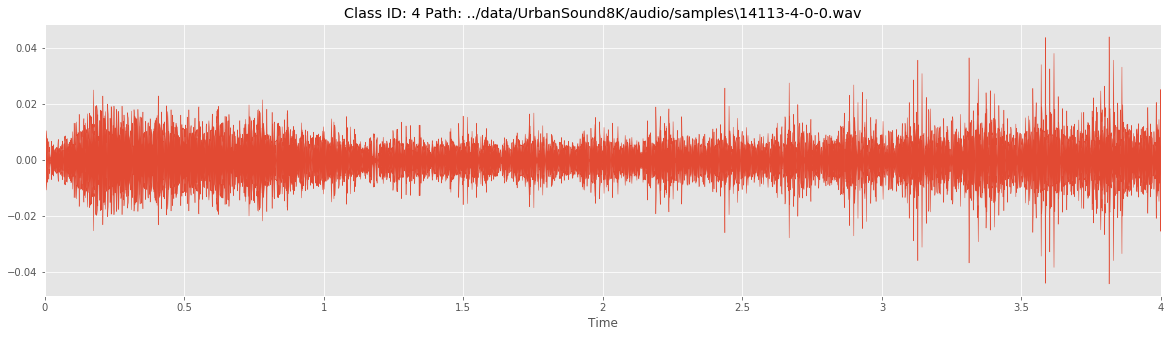

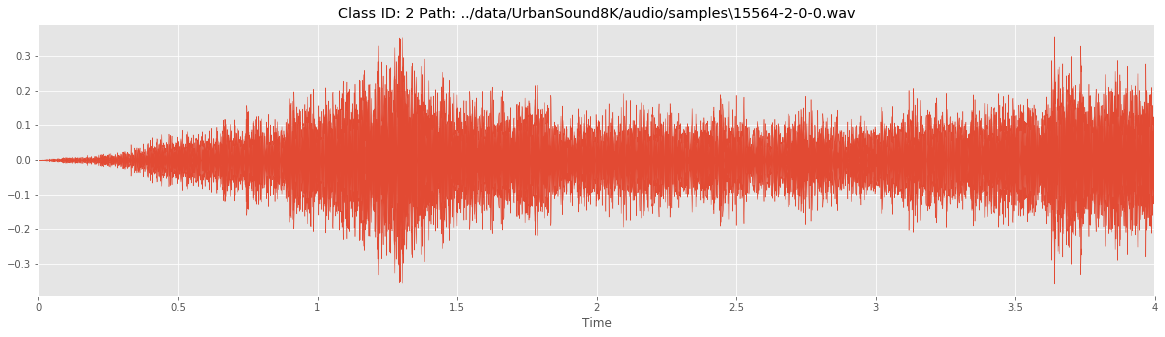

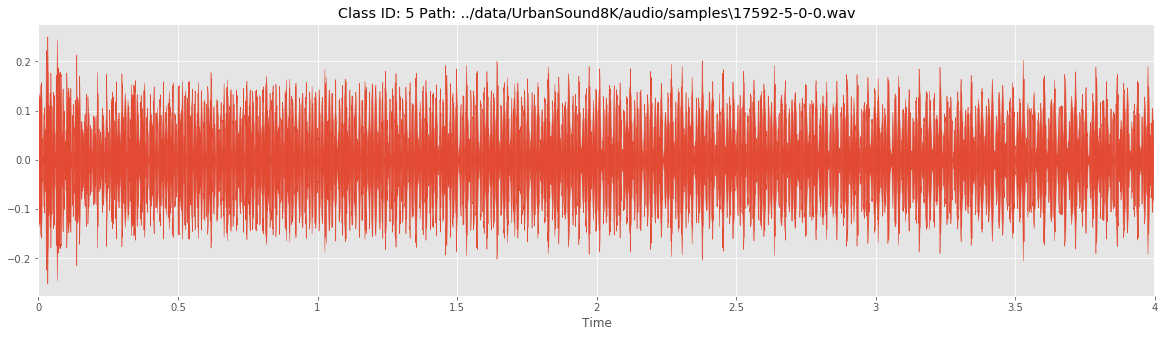

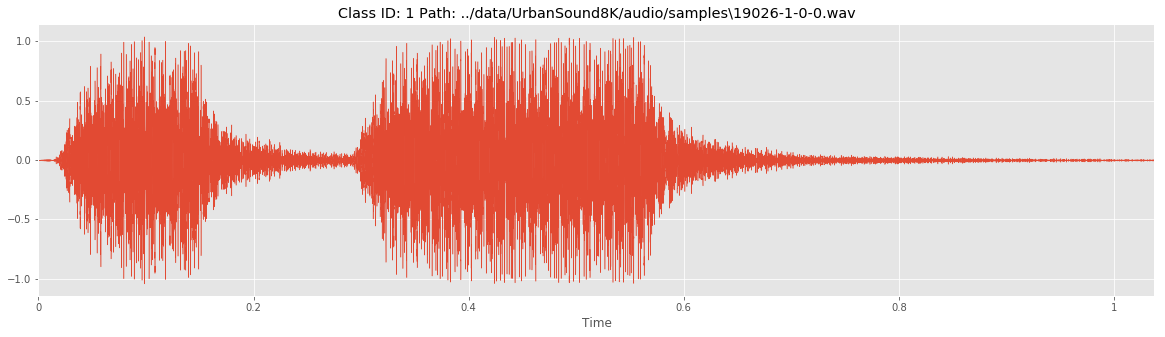

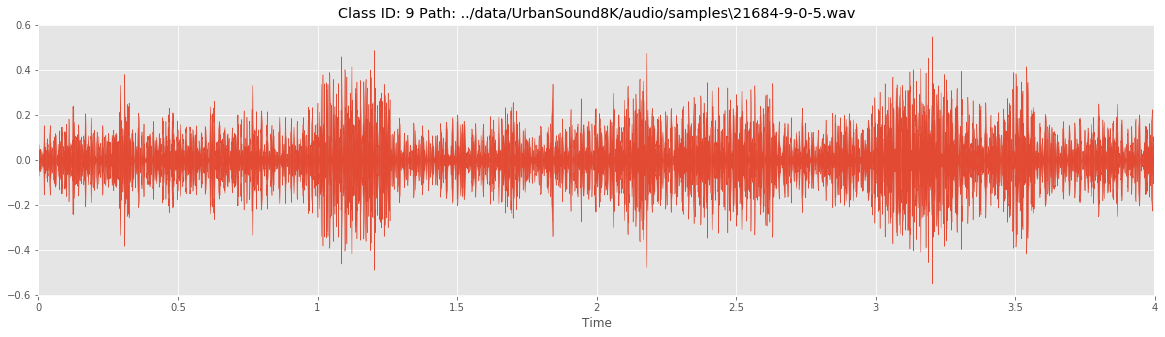

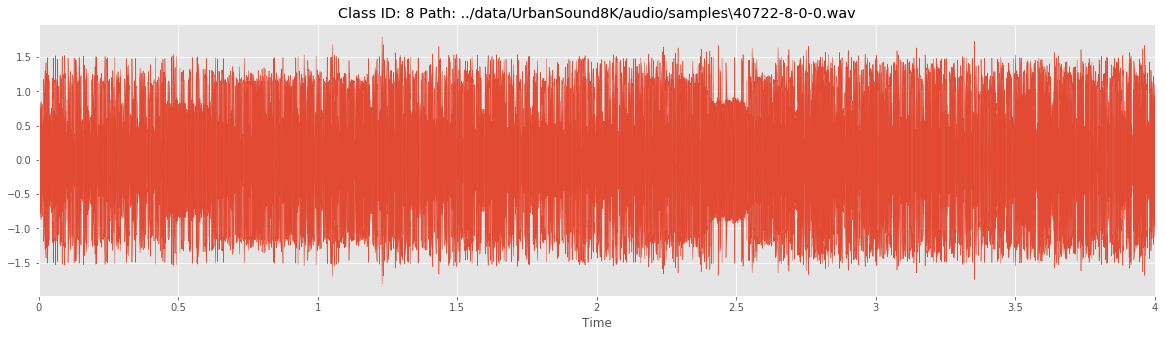

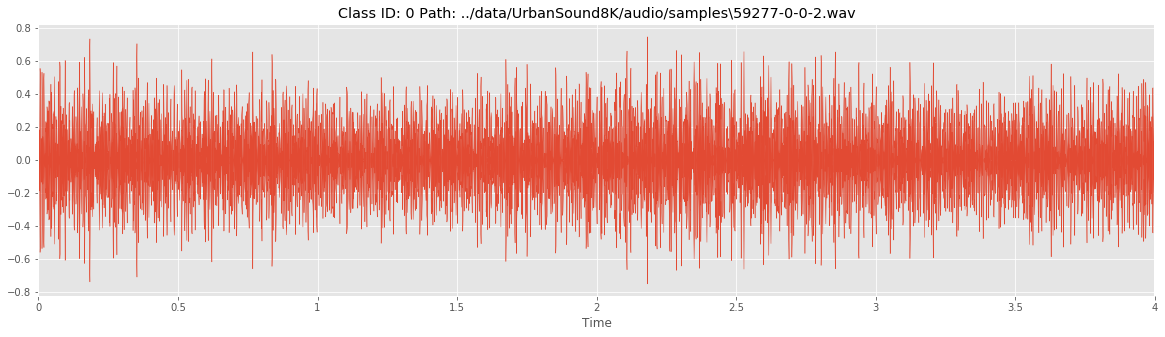

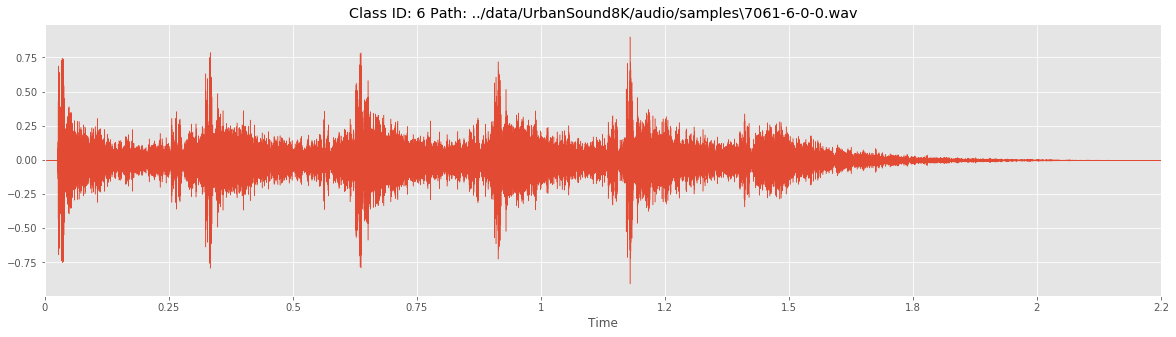

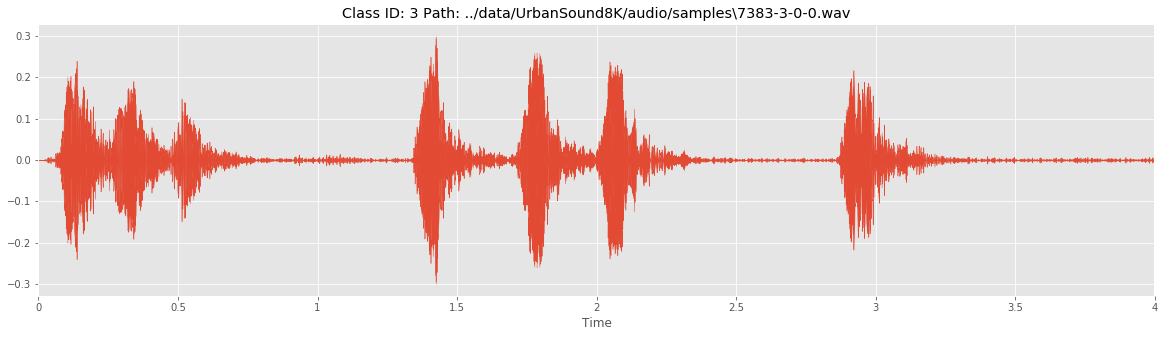

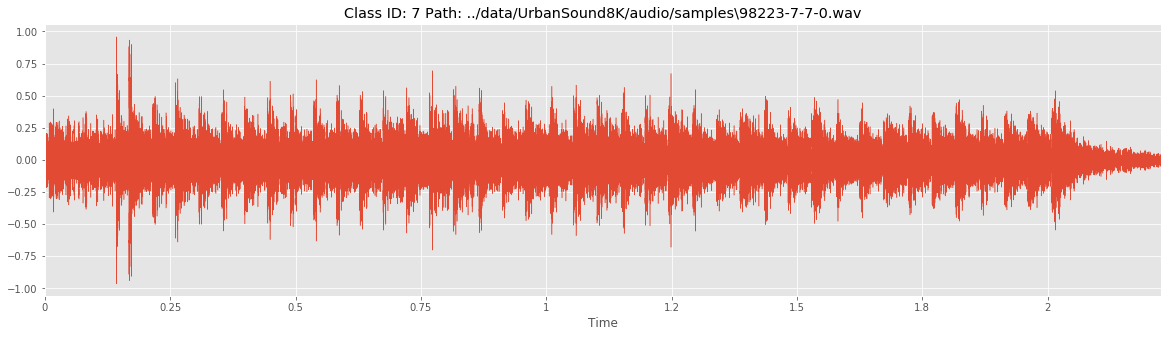

In [9]:
for file in files:
    x, sr=librosa.load(file)
    plt.figure(figsize=(20,5))
    librosa.display.waveplot(x,sr=sr)
    plt.title('Class ID: '+file.split('\\')[1].split('-')[1]+' Path: '+file)
    
plt.show()

# 音频特征

## 短时频谱

回到开始的这段音频，先读取他的时域数据

street_music:



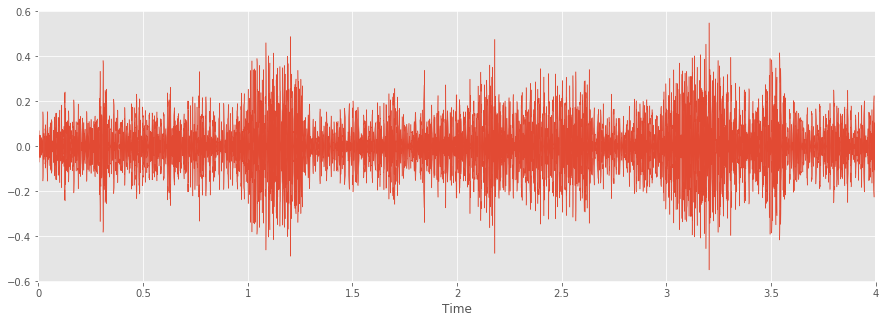

In [10]:
print('street_music:\n')

x, sr = librosa.load(files[4])
plt.figure(figsize=(15,5))
librosa.display.waveplot(x, sr=sr)
plt.show()

In [11]:
ipd.Audio(files[4])

使用`librosa.stft()`进行短时傅里叶变换

<https://librosa.github.io/librosa/generated/librosa.core.stft.html>

<https://librosa.github.io/librosa/generated/librosa.core.power_to_db.html>

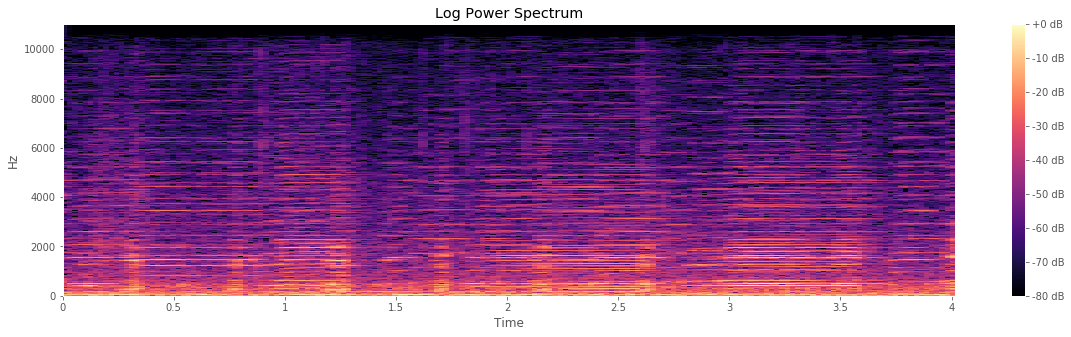

In [12]:
import numpy as np
S = np.abs(librosa.stft(x))
Xdb = librosa.power_to_db(S**2, ref=np.max)
# Xdb = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(20,5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Log Power Spectrum')
plt.show()

## Melspectrogram

<https://librosa.github.io/librosa/generated/librosa.feature.melspectrogram.html>

melspectrogram.shape: (128, 173)


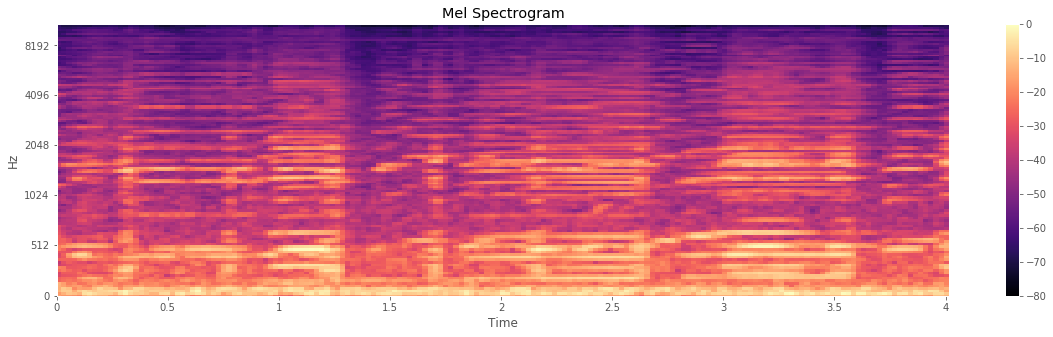

In [13]:
# S = np.abs(librosa.stft(x))
mel = librosa.feature.melspectrogram(y=x, sr=sr)
meldb = librosa.power_to_db(mel,ref=np.max)
print('melspectrogram.shape: '+str(mel.shape))
plt.figure(figsize=(20,5))
librosa.display.specshow(meldb, x_axis='time', y_axis='mel')
plt.colorbar()
plt.title('Mel Spectrogram')
plt.show()

## MFCC

<https://librosa.github.io/librosa/generated/librosa.feature.mfcc.html>

In [14]:
Xdb.shape

(1025, 173)

mfccs.shape: (40, 173)


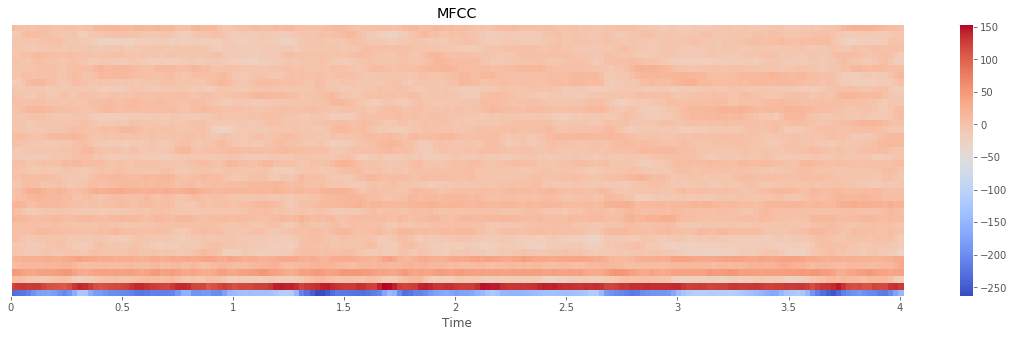

In [15]:
mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40)
print('mfccs.shape: '+str(mfccs.shape))
plt.figure(figsize=(20,5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()

## Chroma

<https://librosa.github.io/librosa/generated/librosa.feature.chroma_stft.html>

chroma.shape: (12, 173)


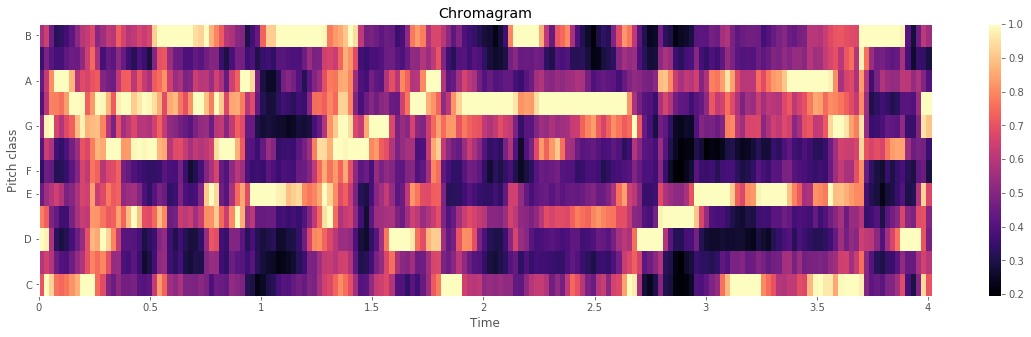

In [16]:
S = np.abs(librosa.stft(x))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
print('chroma.shape: '+str(chroma.shape))
plt.figure(figsize=(20,5))
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')
plt.show()